## Import Packages


In [1]:
from torch import *
from torchvision import *
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import cv2

## Load Pre-Trained AlexNet Model

In [2]:
alex = models.alexnet(pretrained=True)
alex = alex.cuda()
alex.eval()

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

## Define Hook to retrieve output of Activation Maps

In [3]:
class Hook():
    def __init__(self,module,backward = False):
        self.hook = module.register_forward_hook(self.hook_fn)

    def hook_fn(self,module,input_,output):
        self.input = input_
        self.output = output
        # print(type(output))

    def close(self):
        self.hook.remove()

## Define function to retrieve output of Activation Maps

In [4]:
def outputs(model,image_tensor,layer):
    image_tensor = image_tensor.unsqueeze(0).cuda()
    hook = Hook(layer)
    _ = model(image_tensor)
    output = hook.output
    return output

In [5]:
norm = transforms.Compose([transforms.ToTensor(),transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])])

## Define layer to be visualized

In [6]:
layer = list(alex.features.modules())[1]

## Load layer

In [7]:
img_path = './images/snake.jpg'
image = Image.open(img_path)
image_tensor = norm(image)
output = outputs(alex,image_tensor,layer)
output = output.squeeze(0).cpu()
output.size()
# image.show()

torch.Size([1, 64, 55, 55])

In [8]:

output.size()

torch.Size([64, 55, 55])

In [9]:
permuted = output.permute(1,2,0)
permuted.size()

torch.Size([55, 55, 64])

In [10]:
images = []
num_features = permuted.size()[2]
for i in range(num_features):
    im = transforms.ToPILImage()(permuted[:,:,i].cpu()).convert('RGB')
    images.append(im)


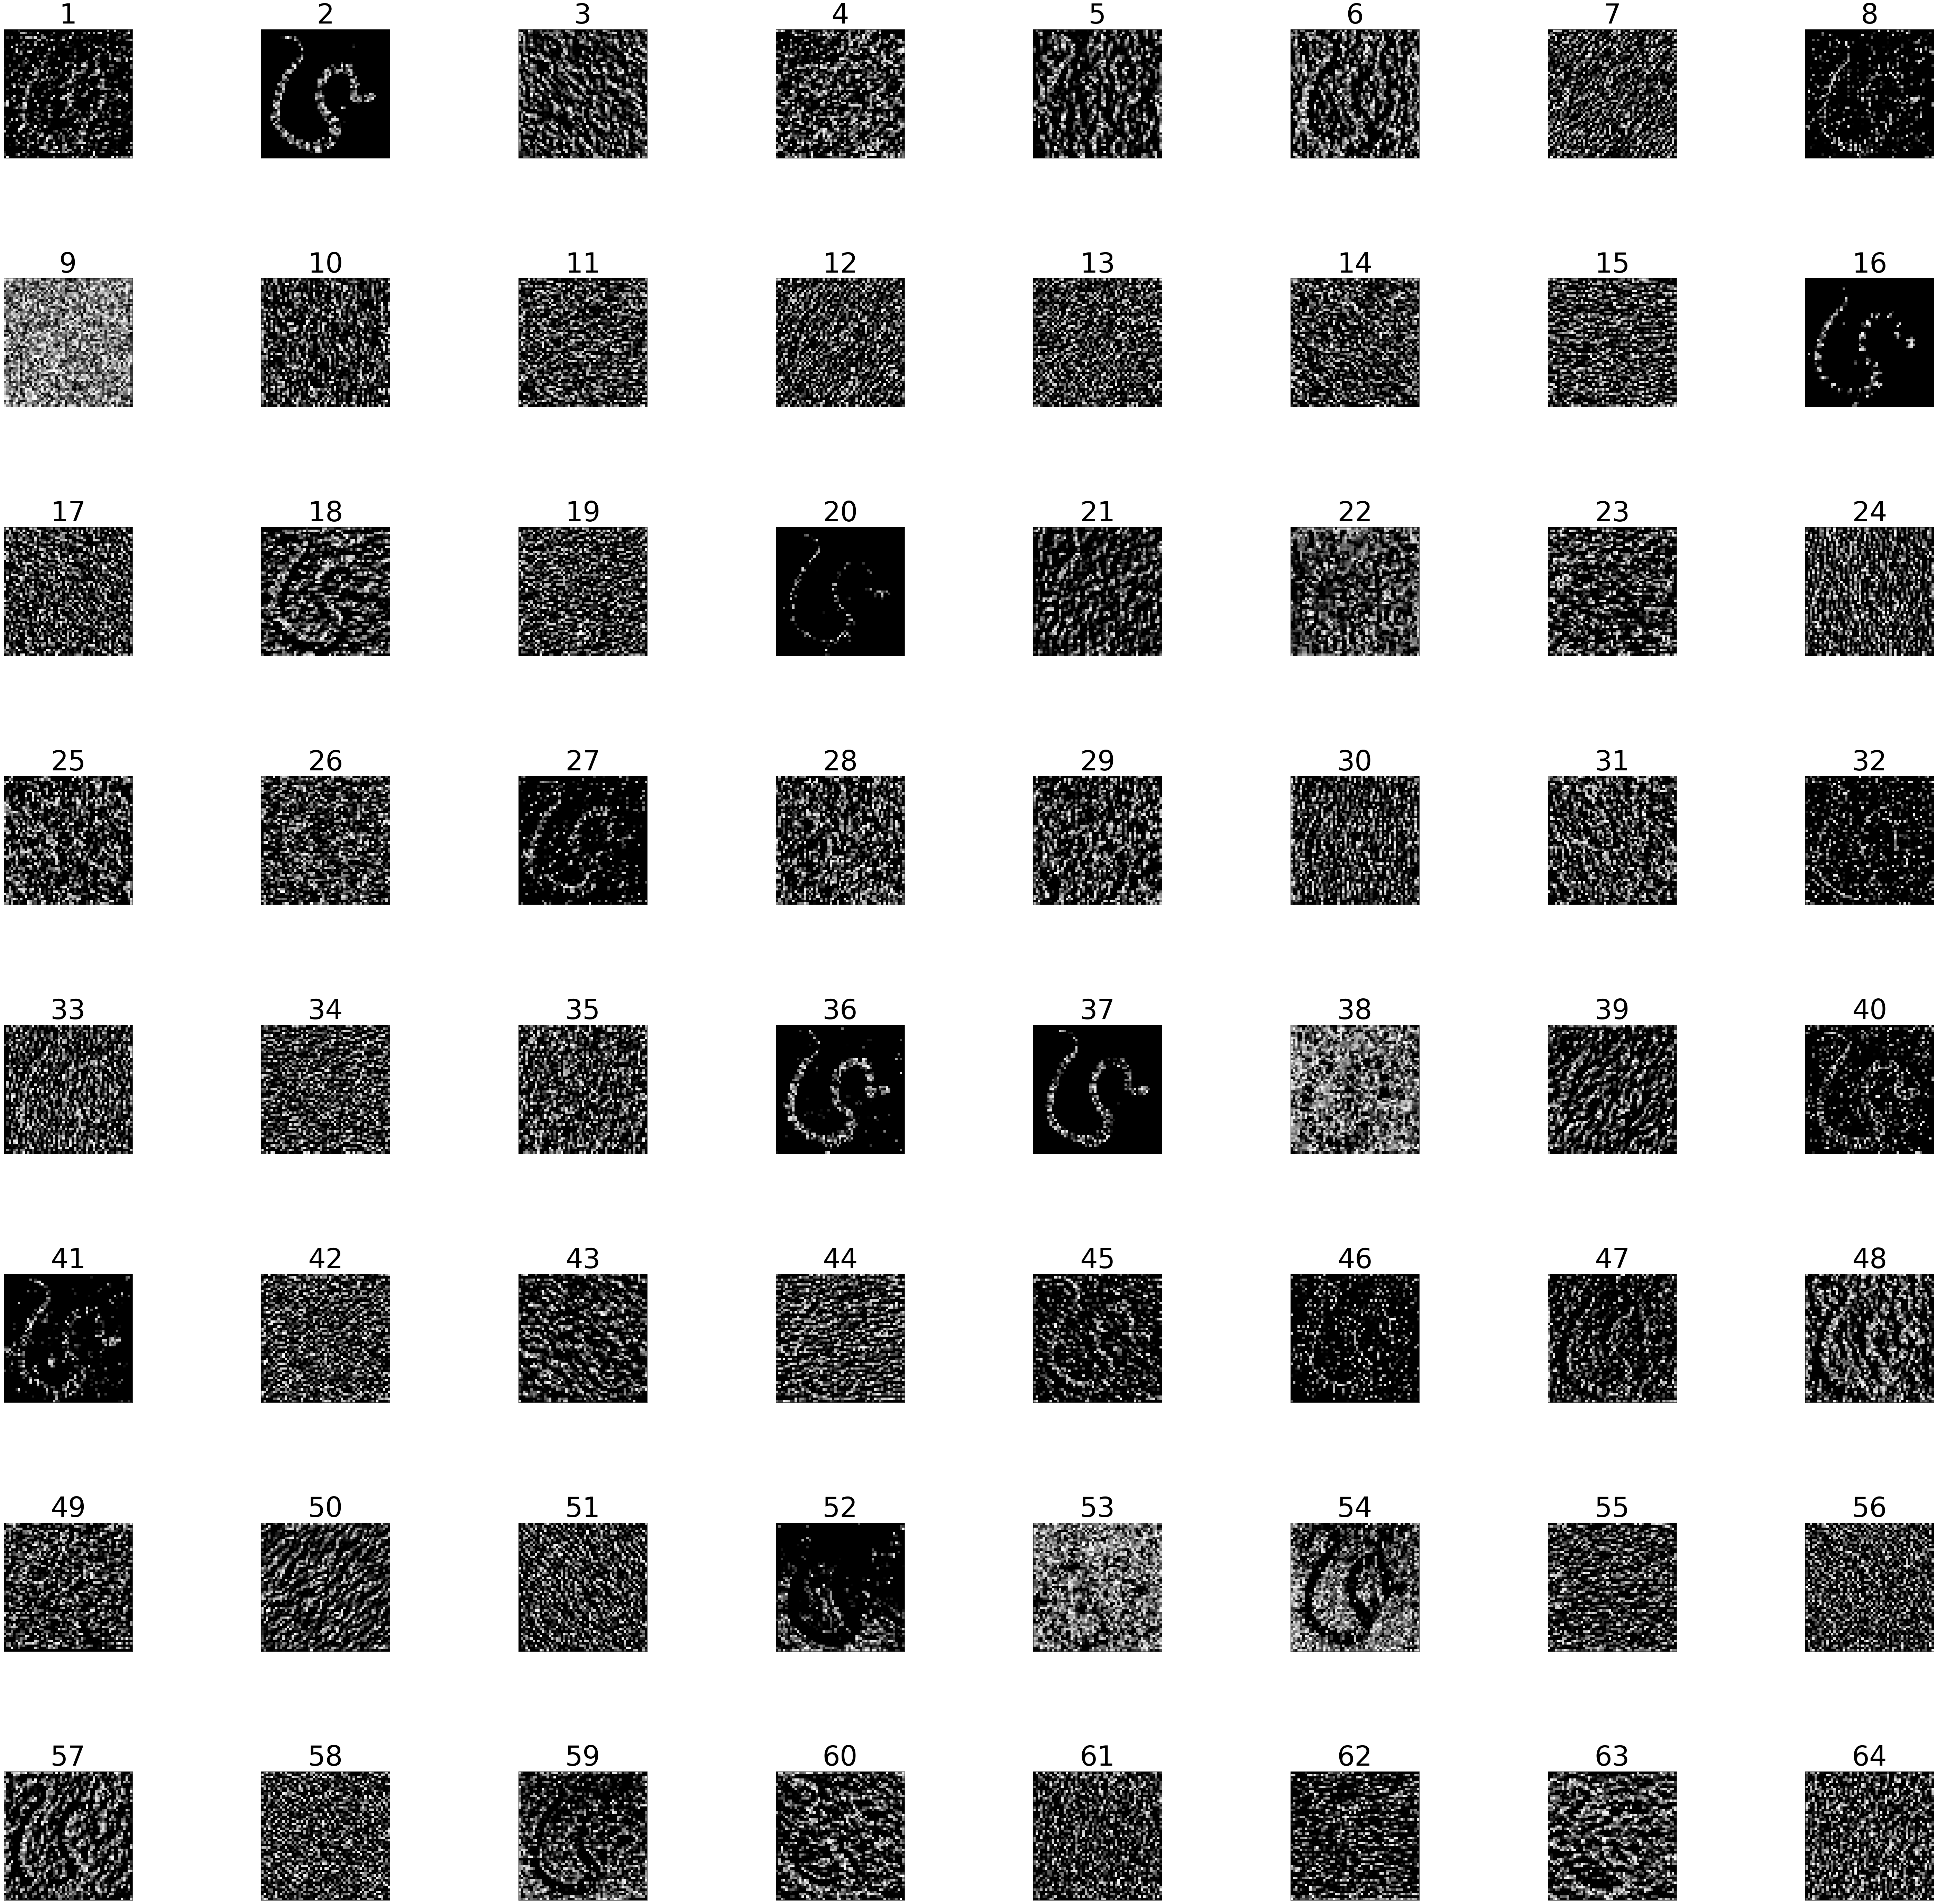

In [11]:
fig = plt.figure(figsize = (100,100))
ax=list()
dims = int(np.log2(num_features))
dim2 = np.exp2(dims-(dims//2))
dim1 = np.exp2(dims//2)

for i in range(num_features):
    ax.append(fig.add_subplot(dim1,dim2,i+1))
    ax[i].title.set_text(str(i+1))
    ax[i].title.set_fontsize(80)
    ax[i].set_xticks([])
    ax[i].set_yticks([])
    ax[i].imshow(images[i])

plt.subplots_adjust(hspace = 0.8,wspace = 1)
plt.show()
